# Main Library

In [1]:
# Read Data & Visulization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Build Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# XGBoost
import xgboost as xgb

In [4]:
# Read Data

data = pd.read_csv(r"D:\Courses language programming\5_Machine Learning\Dataset For Machine Learning\Breast Cancer\data.csv")
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Cleaning Data

data.drop(columns=["id", "Unnamed: 32"], axis=1, inplace=True)

data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Check For Null Value

data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### I Dont Have Null Value In my Data 

C:\Users\osama\AppData\Local\Temp\ipykernel_2324\156730211.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, square=True, cmap="Blues", fmt="0.2f", cbar=True)


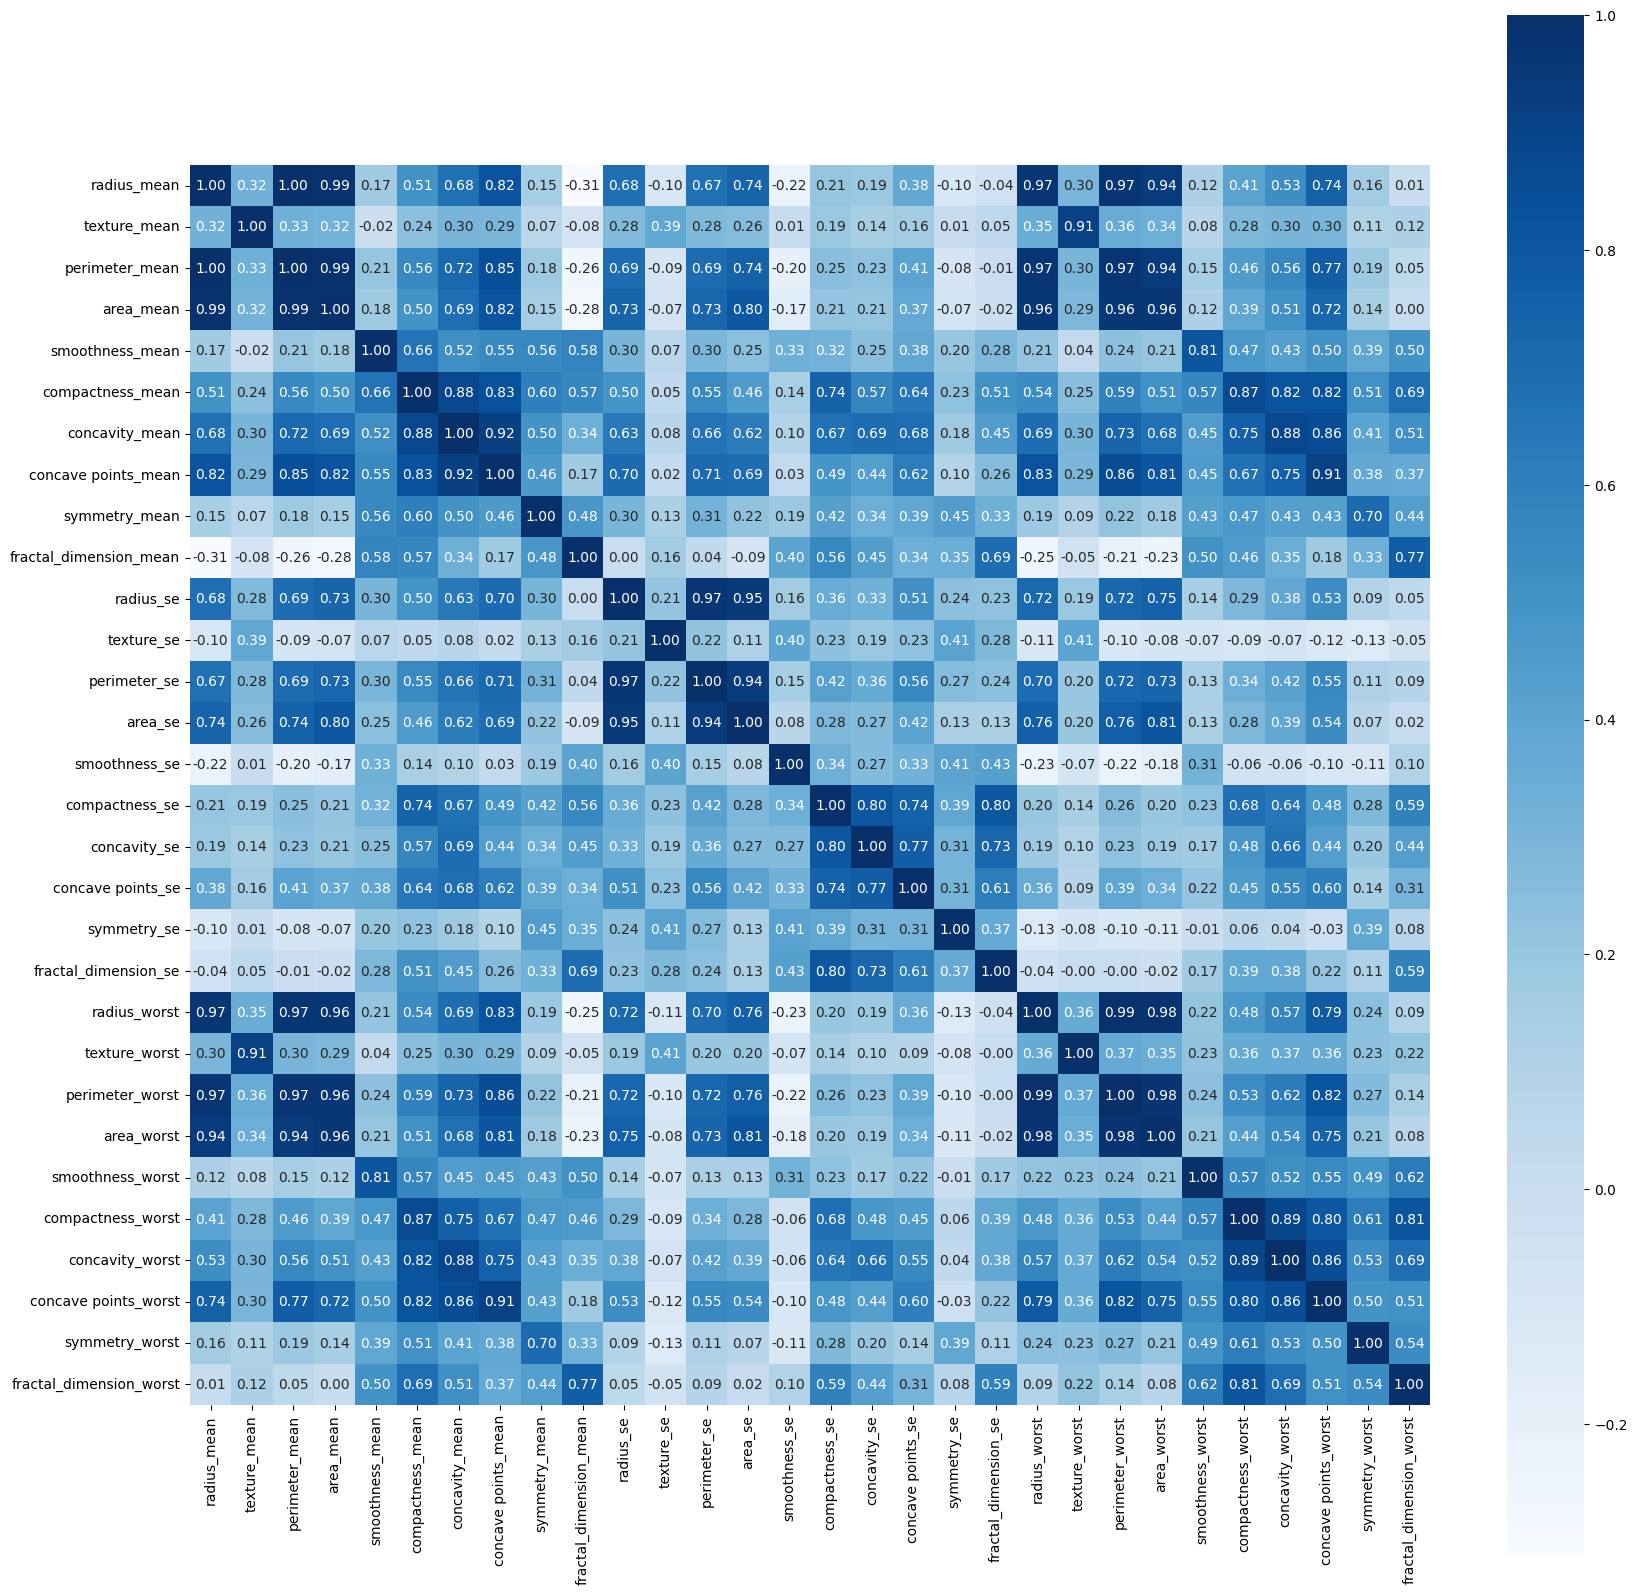

In [8]:
plt.figure(figsize=(20,  20))
sns.heatmap(data.corr(), annot=True, square=True, cmap="Blues", fmt="0.2f", cbar=True)
plt.show()

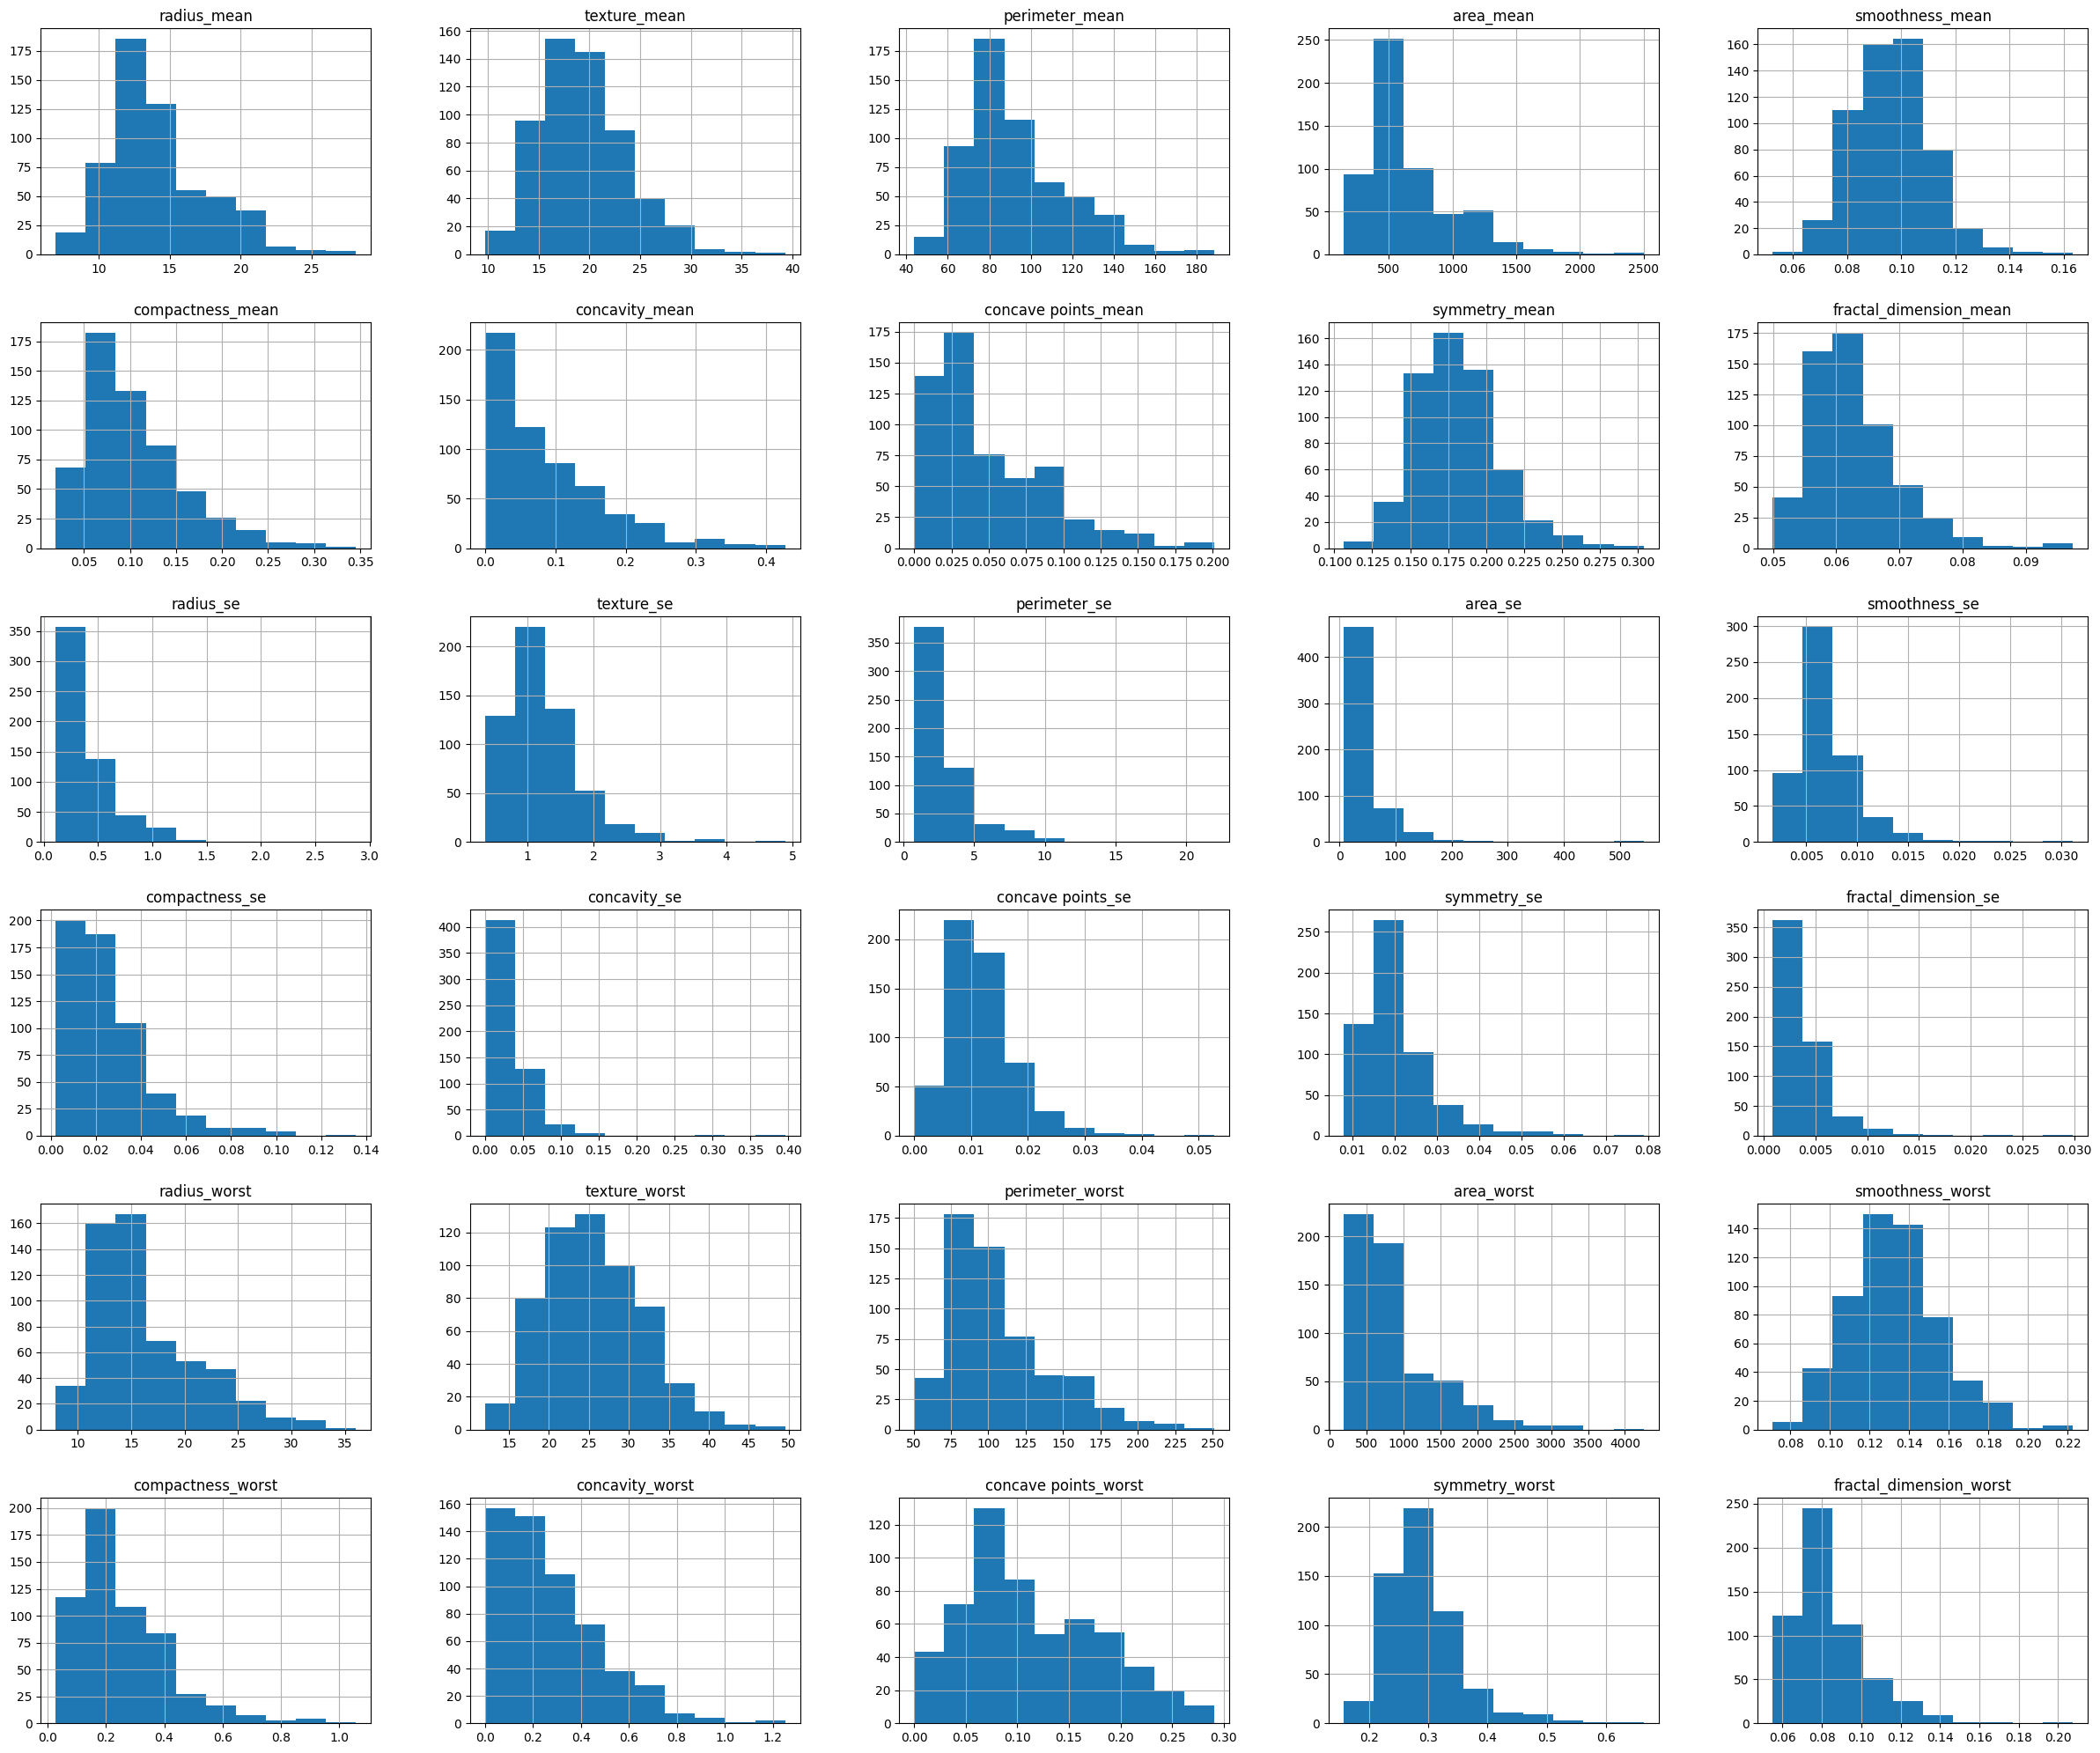

In [9]:
data.hist(figsize=(30, 25));

In [10]:
data.drop(data[data["smoothness_worst"] >= 0.20].index, axis=0, inplace=True)
data.drop(data[data["smoothness_mean"] >= 0.15].index, axis=0, inplace=True)
data.drop(data[data["fractal_dimension_worst"] > 0.15].index, axis=0, inplace=True)
data.drop(data[data["area_mean"] > 2000].index, axis=0, inplace=True)
data.drop(data[data["smoothness_se"] > 0.02].index, axis=0, inplace=True)

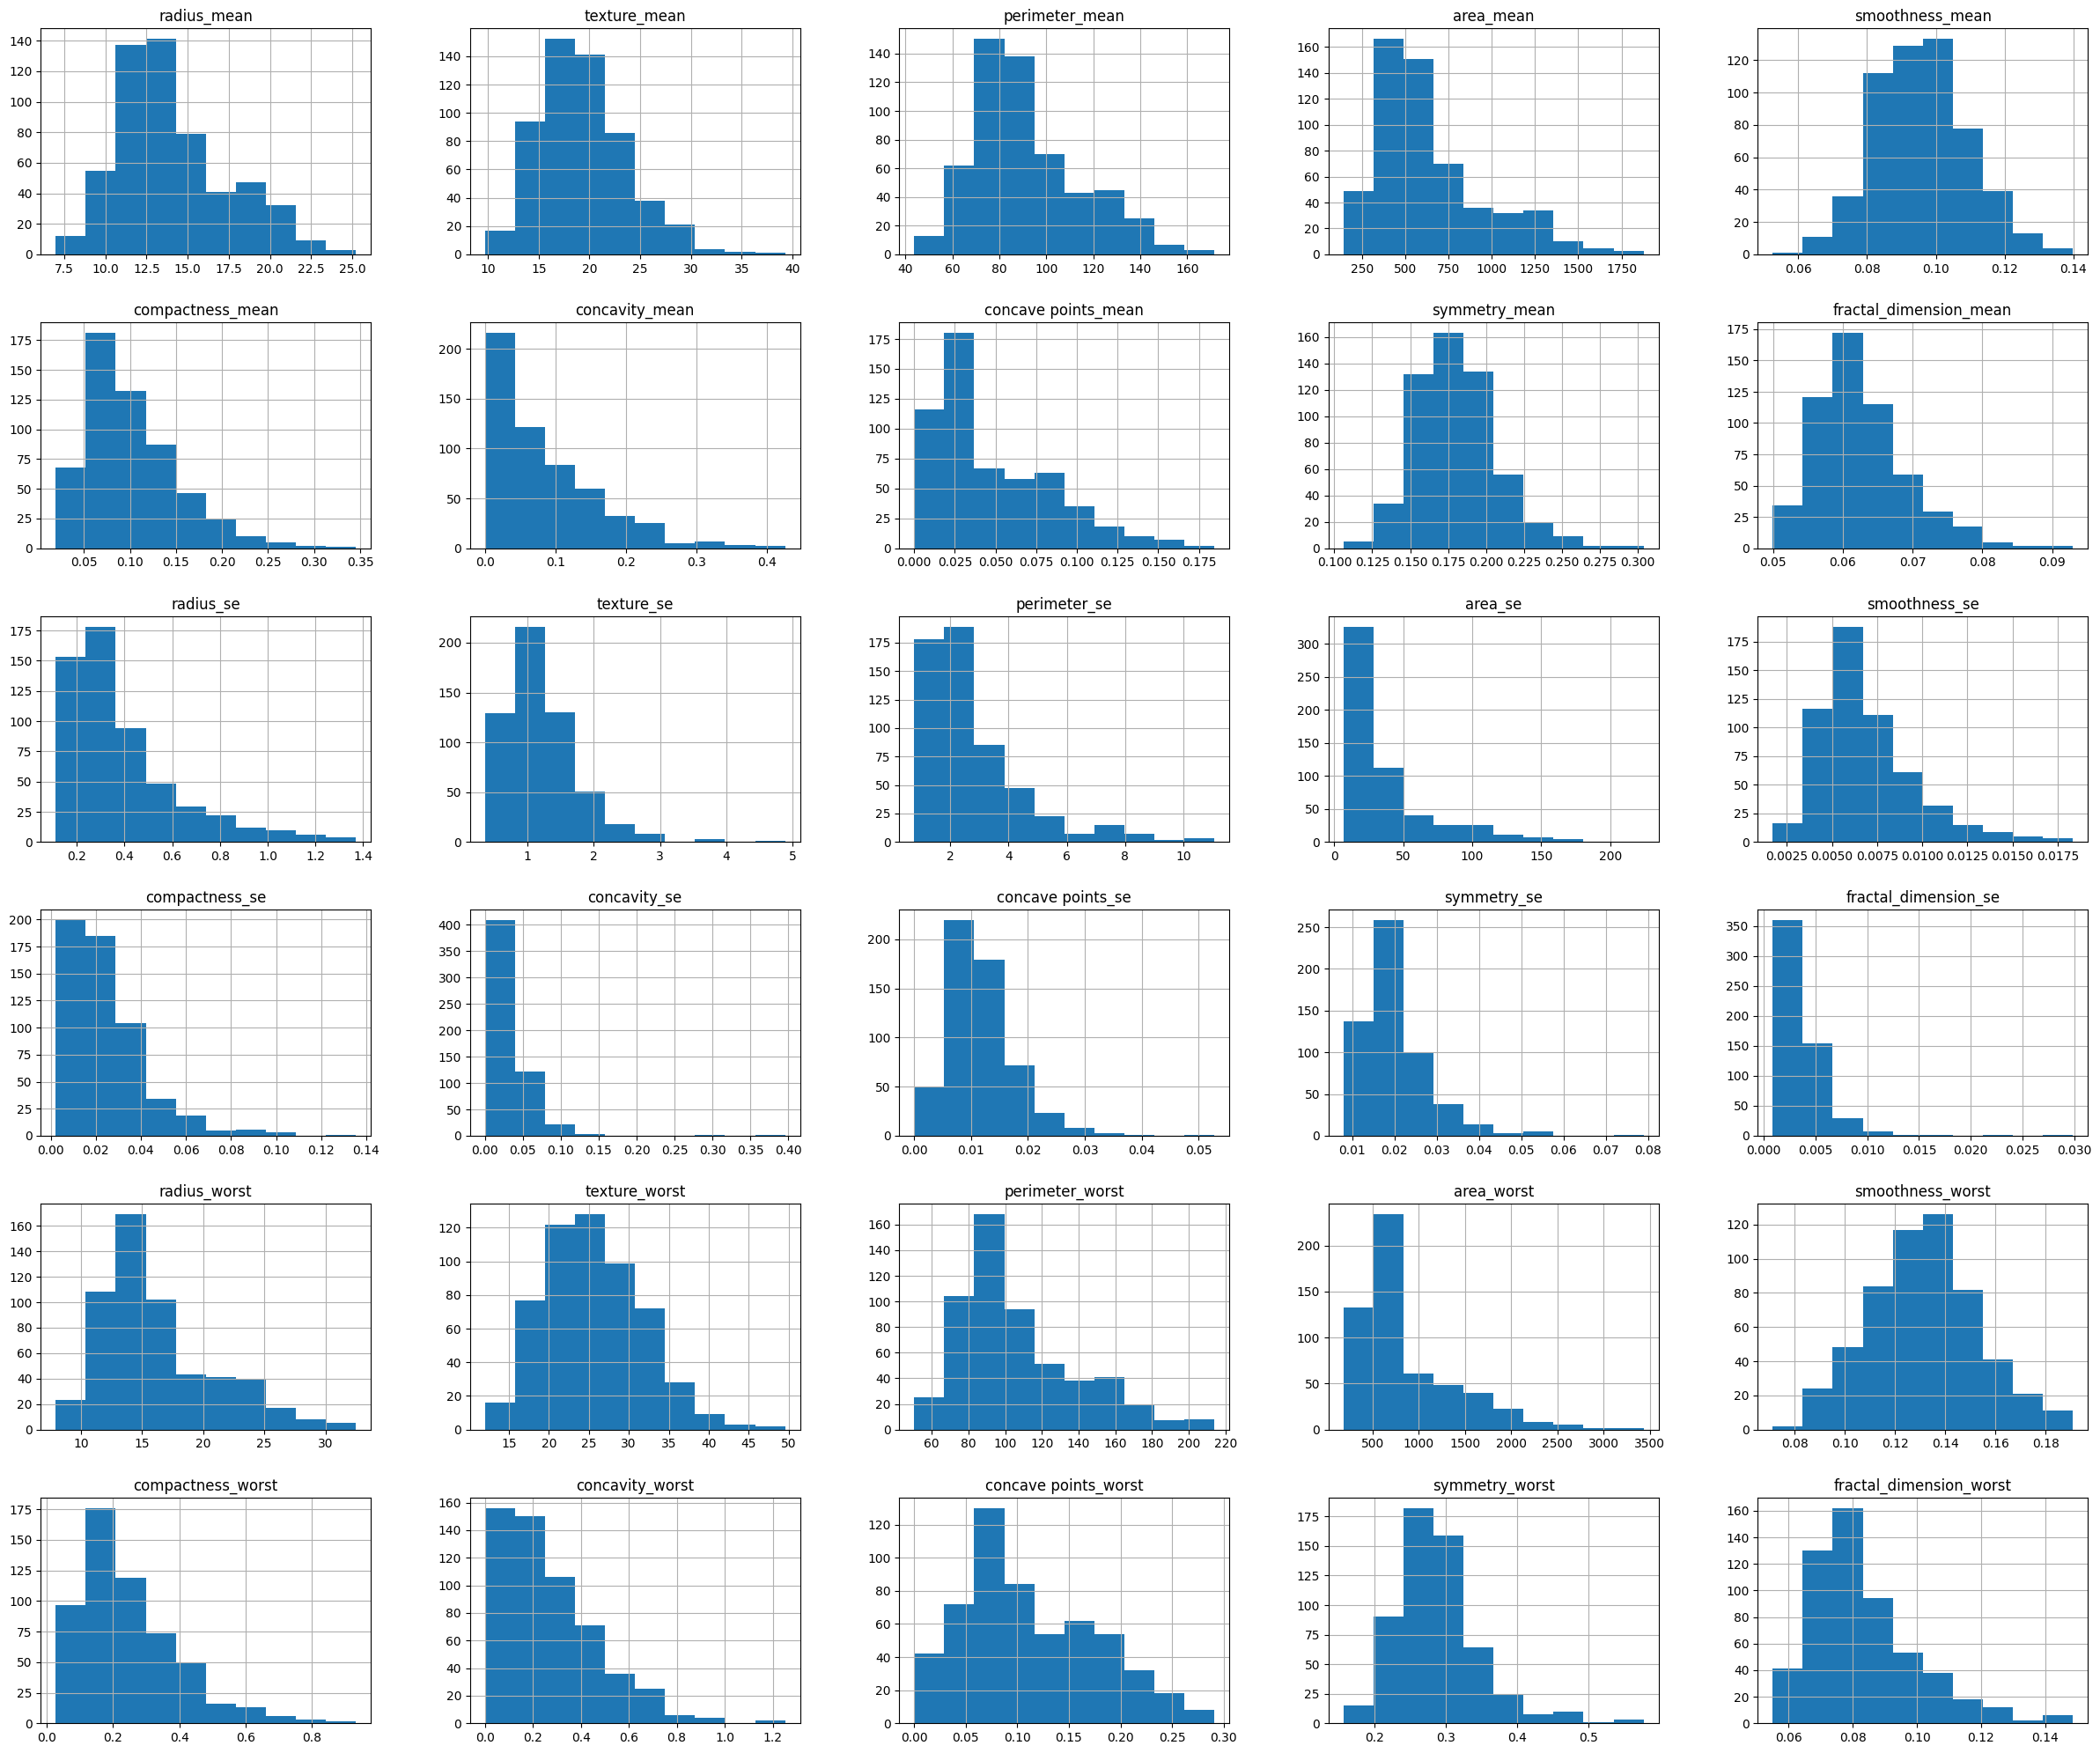

In [11]:
data.hist(figsize=(30, 25));

# Splitting Data & Preprocessing

In [12]:
La = LabelEncoder()
data["diagnosis"] = La.fit_transform(data["diagnosis"])

data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


## M ==> 1
## B ==> 0

In [13]:
X = data.drop(columns="diagnosis", axis=1)
Y = data["diagnosis"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

# Building Model

In [15]:
x_train.shape, y_train.shape

((389, 30), (389,))

## Model 1 ===> LogisticRegression

In [45]:
model_Lo = LogisticRegression(max_iter=15000)
model_Lo.fit(x_train, y_train)

print("The Prediction of Train is ==> " ,  model_Lo.score(x_train, y_train))
print("The Prediction of Test is ==> " ,  model_Lo.score(x_test, y_test))

The Prediction of Train is ==>  0.9562982005141388
The Prediction of Test is ==>  0.9341317365269461


## Model 2 ===> RandomForestClassifier

In [95]:
model_RF = RandomForestClassifier(n_estimators=1000, max_depth=1000, 
                                  min_samples_leaf=7, 
                                  min_samples_split=7, 
                                  max_leaf_nodes=5, max_features=5)
model_RF.fit(x_train, y_train)

print("The Prediction of Train is ==> " ,  model_RF.score(x_train, y_train))
print("The Prediction of Test is ==> " ,  model_RF.score(x_test, y_test))

The Prediction of Train is ==>  0.9768637532133676
The Prediction of Test is ==>  0.9520958083832335


## Model 3 ==> AdaBoostClassifier

In [133]:
Adaboost_reg = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20, 
                                                                        min_samples_split=8,
                                                                        min_samples_leaf=4),
                              n_estimators=200,
                              learning_rate=0.1)


Adaboost_reg.fit(x_train, y_train)

print(f"The predict Score Train is ==> {Adaboost_reg.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {Adaboost_reg.score(x_test, y_test)}")

The predict Score Train is ==> 1.0
%----------------------------------------------------------%
The predict Score Test is ==> 0.9820359281437125


## Model 4 ===> XGBoost

In [200]:
model_xgb = xgb.XGBClassifier(n_estimators=100, max_depth=10,
                             learning_rate=0.5)

model_xgb.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_xgb.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_xgb.score(x_test, y_test)}")

The predict Score Train is ==> 1.0
%----------------------------------------------------------%
The predict Score Test is ==> 0.9640718562874252


### Building System Prediction

In [212]:
input_Feature = np.asarray(list(map(float, input().split(",")))).reshape(1, -1)
                           
prediction = Adaboost_reg.predict(input_Feature)
print(prediction)
                            

17.14,16.4,116,912.7,0.1186,0.2276,0.2229,0.1401,0.304,0.07413,1.046,0.976,7.276,111.4,0.008029,0.03799,0.03732,0.02397,0.02308,0.007444,22.25,21.4,152.4,1461,0.1545,0.3949,0.3853,0.255,0.4066,0.1059
[1]


C:\Users\osama\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
